Author: Aditya Joshi

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/leaderboard

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
pd.set_option('display.float_format', lambda x:'{:.3f}'.format(x))

In [2]:
train = pd.read_csv('/Users/adityajoshi/DataSets/Datasets/House Prices/train.csv')
test = pd.read_csv('/Users/adityajoshi/DataSets/Datasets/House Prices/test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_ID = train['Id']
test_ID = test['Id']
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

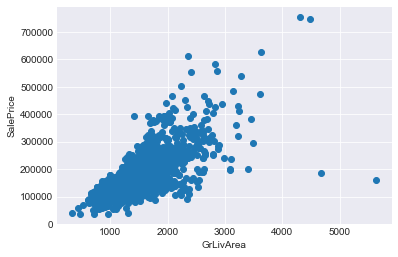

In [4]:
#EDA
fig,ax = plt.subplots()
ax.scatter(x = train['GrLivArea'],y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.show()

In [5]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)].index)


 mu=180932.92 and sigma=79467.79


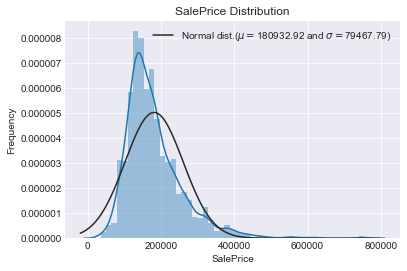

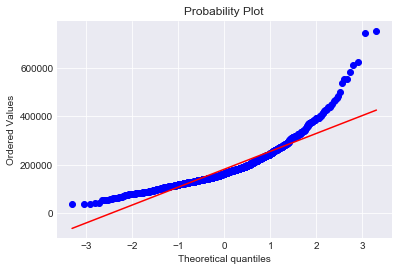

In [6]:
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma) = norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f}'.format(mu,sigma))
plt.legend(['Normal dist.($\mu=${:.2f} and $\sigma=${:.2f})'.format(mu,sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



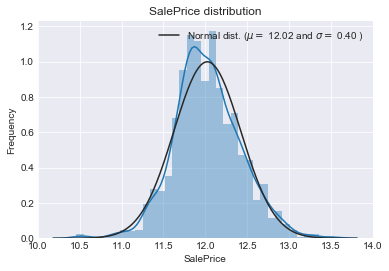

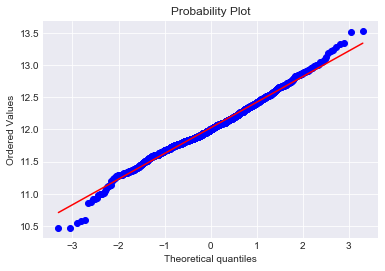

In [7]:
train['SalePrice'] = np.log1p(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)
plt.show()

In [8]:
n_train = train.shape[0]
n_test = test.shape[0]
y_train = train.SalePrice.values
train_test_data = pd.concat((train,test)).reset_index(drop=True)
train_test_data.drop(['SalePrice'],axis = 1,inplace=True)
print train_test_data.shape

(2917, 79)


In [9]:
train_test_data_na = (train_test_data.isnull().sum() / len(train_test_data)) * 100
train_test_data_na = train_test_data_na.drop(train_test_data_na[train_test_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': train_test_data_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.691
MiscFeature,96.400
Alley,93.212
Fence,80.425
FireplaceQu,48.680
LotFrontage,16.661
GarageQual,5.451
GarageCond,5.451
GarageFinish,5.451
GarageYrBlt,5.451


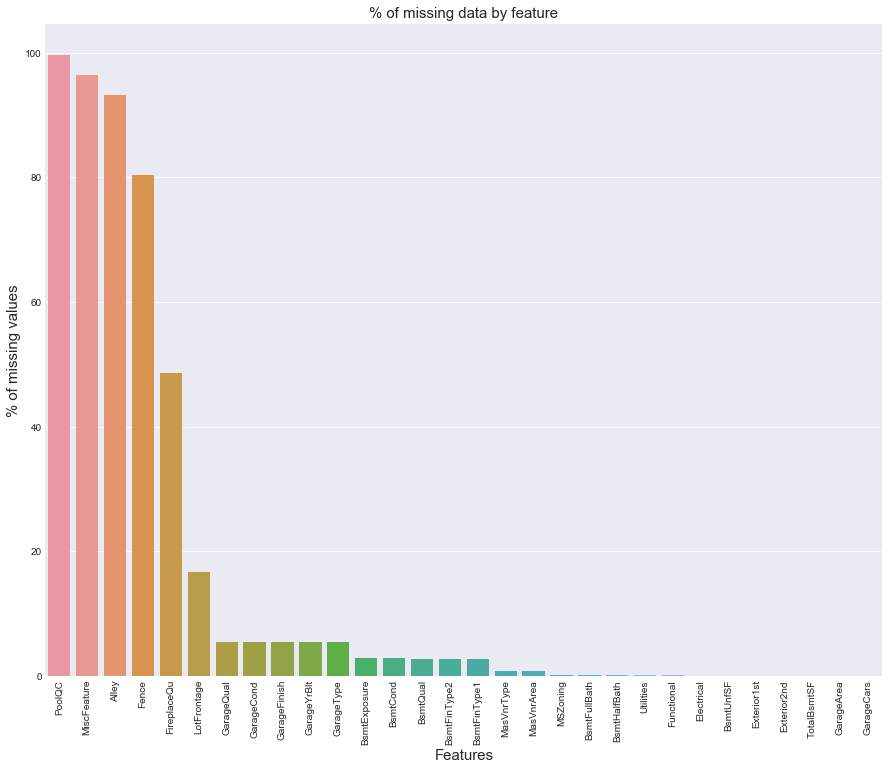

In [10]:
f, ax = plt.subplots(figsize=(15,12))
plt.xticks(rotation=90)
sns.barplot(x = train_test_data_na.index,y = train_test_data_na)
plt.xlabel('Features',fontsize=15)
plt.ylabel('% of missing values',fontsize=15)
plt.title('% of missing data by feature',fontsize=15)

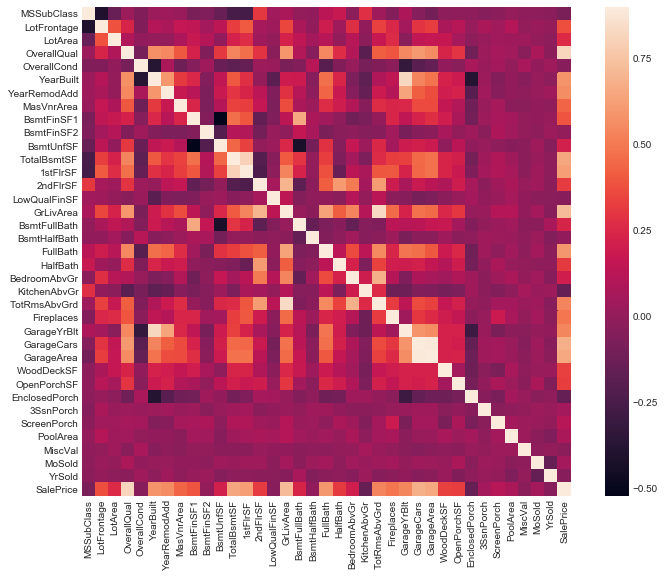

In [11]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9,square=True)

In [12]:
# Fill missing data
train_test_data['PoolQC'] = train_test_data['PoolQC'].fillna("None")

In [13]:
train_test_data['MiscFeature'] = train_test_data['MiscFeature'].fillna("None")
train_test_data['Alley'] = train_test_data['Alley'].fillna("None")
train_test_data['Fence'] = train_test_data['Fence'].fillna("None")
train_test_data['FireplaceQu'] = train_test_data['FireplaceQu'].fillna("None")

In [14]:
train_test_data['LotFrontage'] = train_test_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [15]:
for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    train_test_data[col] = train_test_data[col].fillna('None')

In [16]:
for col in ('GarageYrBlt','GarageArea','GarageCars'):
    train_test_data[col] = train_test_data[col].fillna(0)

In [17]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train_test_data[col] = train_test_data[col].fillna(0)

In [18]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test_data[col] = train_test_data[col].fillna('None')

In [19]:
train_test_data['MasVnrType'] = train_test_data['MasVnrType'].fillna('None')
train_test_data['MasVnrArea'] = train_test_data['MasVnrArea'].fillna(0)

In [20]:
train_test_data['MSZoning'] = train_test_data['MSZoning'].fillna(train_test_data['MSZoning'].mode()[0])
train_test_data['Functional'] = train_test_data['Functional'].fillna('Typ')
train_test_data['Electrical'] = train_test_data['Electrical'].fillna(train_test_data['Electrical'].mode()[0])
train_test_data['KitchenQual'] = train_test_data['KitchenQual'].fillna(train_test_data['KitchenQual'].mode()[0])
train_test_data['Exterior1st'] = train_test_data['Exterior1st'].fillna(train_test_data['Exterior1st'].mode()[0])
train_test_data['Exterior2nd'] = train_test_data['Exterior2nd'].fillna(train_test_data['Exterior2nd'].mode()[0])
train_test_data['SaleType'] = train_test_data['SaleType'].fillna(train_test_data['SaleType'].mode()[0])
train_test_data['MSSubClass'] = train_test_data['MSSubClass'].fillna("None")

In [21]:
train_test_data = train_test_data.drop(['Utilities'], axis=1)

In [22]:
train_test_data_na = (train_test_data.isnull().sum() / len(train_test_data)) * 100
train_test_data_na = train_test_data_na.drop(train_test_data_na[train_test_data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing values':train_test_data_na})
train_test_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.000,0.000,...,Normal,WD,0,Pave,8,856.000,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.000,0.000,...,Normal,WD,0,Pave,6,1262.000,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.000,0.000,...,Normal,WD,0,Pave,6,920.000,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.000,0.000,...,Abnorml,WD,0,Pave,7,756.000,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.000,0.000,...,Normal,WD,0,Pave,9,1145.000,192,2000,2000,2008


In [23]:
train_test_data['MSSubClass'] = train_test_data['MSSubClass'].apply(str)
train_test_data['OverallCond'] = train_test_data['OverallCond'].astype(str)
train_test_data['YrSold'] = train_test_data['YrSold'].astype(str)
train_test_data['MoSold'] = train_test_data['MoSold'].astype(str)

In [24]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold','BldgType','Condition1','Condition2','Electrical','Exterior1st','Exterior2nd',
       'MasVnrType','MiscFeature','Neighborhood','RoofMatl','RoofStyle','SaleCondition','SaleType',
       'Foundation','GarageType','Heating','HouseStyle','LandContour','LotConfig','MSZoning')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(train_test_data[c].values))
    train_test_data[c] = lbl.transform(list(train_test_data[c].values))
df_num = train_test_data.select_dtypes(include=[object])
print df_num

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[2917 rows x 0 columns]


In [25]:
train_test_data['TotalSF'] = train_test_data['1stFlrSF'] + train_test_data['TotalBsmtSF'] + train_test_data['2ndFlrSF']

In [26]:
numeric_feats = train_test_data.dtypes[train_test_data.dtypes != 'object'].index
skewed_feats = train_test_data[numeric_feats].apply(lambda x : skew(x.dropna())).sort_values(ascending = False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'skew':skewed_feats})
skewness.tail(10)


Skew in numerical features: 



,skew
GarageQual,-3.073
Electrical,-3.080
LandContour,-3.132
CentralAir,-3.458
GarageCond,-3.594
SaleType,-3.731
GarageYrBlt,-3.905
Functional,-4.054
Street,-15.495
PoolQC,-21.218


In [27]:
skewness = skewness[abs(skewness) > 0.75]
from scipy.special import boxcox1p
skewed_features = skewness.index
lmbda = 0.15

for feat in skewed_features:
    train_test_data[feat] = boxcox1p(train_test_data[feat],lmbda)

In [28]:
train = train_test_data[:n_train]
test = train_test_data[n_train:]

In [29]:
#Models
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import TransformerMixin, RegressorMixin, BaseEstimator, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

/Users/adityajoshi/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return (rmse)

In [31]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005,random_state=1))
ENet = make_pipeline(RobustScaler(),ElasticNet(alpha=0.0005, l1_ratio=.9,random_state=3 ))
KRR = KernelRidge(alpha=0.6,kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000,learning_rate=0.05,max_depth=4,max_features='sqrt',
                                   min_samples_leaf=15,min_samples_split=10,loss='huber',random_state=5)
xgBoost = xgb.XGBRegressor(colsample_bytree=0.4603,gamma=0.0468,learning_rate=0.05,max_depth=3,min_child_weight=1.7817,
                          n_estimators=2200,reg_alpha = 0.4640, reg_lambda=0.8571,subsample=.5213,silent=1,
                           nthread=-1)


In [32]:
lgbmodel = lgb.LGBMRegressor(objective = 'regression',num_leaves = 5, learning_rate=0.05, n_estimators=720, 
                             max_bin = 55, bagging_fraction = 0.8, bagging_freq = 5, feature_fraction = 0.2319,
                            feature_fraction_seed = 9, bagging_seed = 9, mn_data_in_leaf = 6, min_hessian_in_leaf = 11)

In [33]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))
score = rmsle_cv(ENet)
print("\nENet score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))
score = rmsle_cv(KRR)
print("\nKRR score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))
score = rmsle_cv(GBoost)
print("\nGBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))
score = rmsle_cv(xgBoost)
print("\nxgBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Lasso score: 0.1208 (0.0072)


ENet score: 0.1208 (0.0073)


KRR score: 0.1281 (0.0066)


GBoost score: 0.1179 (0.0077)


xgBoost score: 0.1168 (0.0072)



In [34]:
score = rmsle_cv(lgbmodel)
print("\nlgbm score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


lgbm score: 0.1169 (0.0054)



In [35]:
class AveragingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self, models):
        self.models = models

    def fit(self, X, Y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,Y)
        
        return self
    
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis=1)

In [36]:
average_models = AveragingModels(models = (ENet,KRR,GBoost,lasso))
score = rmsle_cv(average_models)
print("\nStacked Models score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Stacked Models score: 0.1153 (0.0072)



In [37]:
class StackingAverageModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self,base_models, meta_model, n_folds = 5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
        
    def fit(self, X, Y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits = self.n_folds, shuffle = True, random_state=156)
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, Y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],Y[train_index])
                Y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = Y_pred
        
        self.meta_model_.fit(out_of_fold_predictions, Y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis = 1)
                                       for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)
        
    

In [38]:
stacked_average_models = StackingAverageModels(base_models = (ENet, GBoost, KRR), meta_model=(lasso))
score = rmsle_cv(stacked_average_models)
print("\nStacked Average Models score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


Stacked Average Models score: 0.1127 (0.0069)



In [39]:
def rmsle(Y, Y_pred):
    return np.sqrt(mean_squared_error(Y, Y_pred))

In [40]:
stacked_average_models.fit(train.values,y_train)
stacked_train_pred = stacked_average_models.predict(train.values)
stacked_pred = np.expm1(stacked_average_models.predict(test.values))
print rmsle(y_train, stacked_train_pred)


0.0769910916487


In [41]:
xgBoost.fit(train,y_train)
xgb_train_pred = xgBoost.predict(train)
xgb_pred = np.expm1(xgBoost.predict(test))
print(rmsle(y_train,xgb_train_pred))

0.0784472023521


In [42]:
lgbmodel.fit(train,y_train)
lgb_train_pred = lgbmodel.predict(train)
lgb_pred = np.expm1(lgbmodel.predict(test.values))
print(rmsle(y_train,lgb_train_pred))

0.0762487333318


In [43]:
ensemble = stacked_pred * 0.7 + xgb_pred + 0.15 + lgb_pred * 0.15

In [44]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('/Users/adityajoshi/DataSets/Datasets/House Prices/submission.csv', index = False)

Kaggle score: 0.61595

Reference kernel: https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard